In [1]:
%pylab inline
import os
import seaborn as sns
import pickle as pkl
pal = sns.color_palette('Blues')
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")
#sns.set(color_codes=True)
from scipy.stats import gaussian_kde
import pandas as pd
from eod import stations_cc

Populating the interactive namespace from numpy and matplotlib


In [2]:
def read_dic_eqpBin(dic70):
    alog = dic70['area']
    log=np.log10(alog)
    drain = dic70['rain']

    thresh = np.squeeze(dic70['thresh'])
    rthresh = np.array([thresh]*alog.shape[1]).transpose()

    ok = np.where(np.isfinite(drain))
    drain70=drain[ok]
    alog70 = alog[ok]
    log70 = log[ok]
    dthresh70 = rthresh.copy()[ok]

    cent = np.arange(10,100,10)
    iscent=[1000]
    for c in cent:
        p=np.percentile(alog70[(alog70>=1000)],c)
        iscent.append(p)

    sizes = np.array(iscent)

    ll = []
    area = []
    nb = []
    center = []#sizes[0:-1] + (sizes[1::] - sizes[0:-1]) / 2
#
    for ind, siz in enumerate(sizes):
       
        if siz == 1000:
            continue
        
        pos = np.where((alog70 < siz) & (alog70 >= sizes[ind-1]))
        aarea = alog70[pos]
        ptresh = drain70[pos]
        ttresh = dthresh70[pos]
        prob=np.sum(ptresh>ttresh)
        
        center.append(np.mean(aarea))
        ll.append(prob)
        area.append(np.sum(aarea))
        nb.append(ptresh.size)
    return(np.array(ll), np.array(area), np.array(nb), np.array(center))    

In [3]:
def read_dic_eqBinsize(dic70):
    alog = dic70['area']
    log=np.log10(alog)
    drain = dic70['rain']

    thresh = np.squeeze(dic70['thresh'])
    rthresh = np.array([thresh]*alog.shape[1]).transpose()

    ok = np.where(np.isfinite(drain))
    drain70=drain[ok]
    alog70 = alog[ok]
    log70 = log[ok]
    dthresh70 = rthresh.copy()[ok]

    sizes = np.arange(1000,500000, 5000)
    ll = []
    area = []
    nb = []
    center = []#sizes[0:-1] + (sizes[1::] - sizes[0:-1]) / 2
#
    for ind, siz in enumerate(sizes):
       
        if siz == 1000:
            continue
        
        pos = np.where((alog70 < siz) & (alog70 >= sizes[ind-1]))
        aarea = alog70[pos]
        ptresh = drain70[pos]
        ttresh = dthresh70[pos]
        prob=np.sum(ptresh>ttresh)
        
        center.append(np.mean(aarea))
        ll.append(prob)
        area.append(np.sum(aarea))
        nb.append(ptresh.size)
    return(np.array(ll), np.array(area), np.array(nb), np.array(center))   

In [4]:
dic70 = stations_cc.readStation(70)
dic40 = stations_cc.readStation(40)
dic60 = stations_cc.readStation(60)

In [5]:
f70 = read_dic_eqpBin(dic70)
f40 = read_dic_eqpBin(dic40)
f60 = read_dic_eqpBin(dic60)
tf70 = read_dic_eqBinsize(dic70)
tf40 = read_dic_eqBinsize(dic40)
tf60 = read_dic_eqBinsize(dic60)

/users/global/cornkle/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


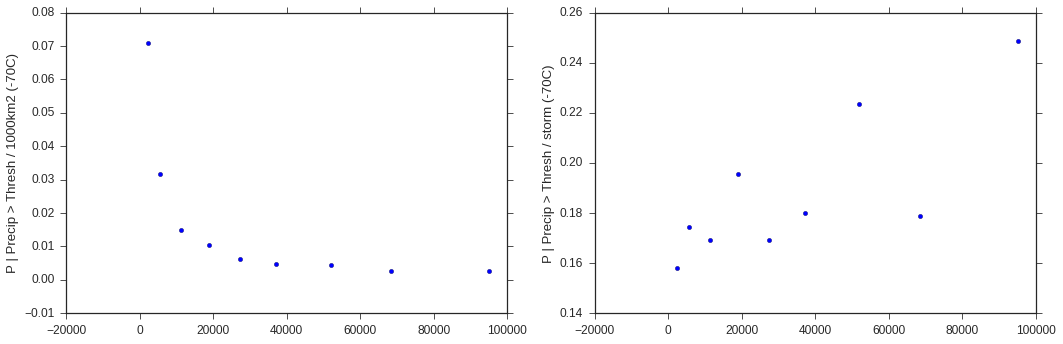

In [6]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,5), dpi=400)
ax = f.add_subplot(121)
plt.scatter(f70[3], f70[0]/(f70[1]/1000))
plt.ylabel("P | Precip > Thresh / 1000km2 (-70C)" )
ax = f.add_subplot(122)
plt.scatter(f70[3], f70[0]/f70[2])
plt.ylabel("P | Precip > Thresh / storm (-70C)" )
plt.tight_layout()
# ax = f.add_subplot(223)
# plt.scatter(np.log10(center), ll/(area/1000))
# plt.ylabel("P | Precip > Thresh / 1000km2 (-40C)" )
# plt.tight_layout()
# ax = f.add_subplot(224)
# plt.scatter(np.log10(center), ll/nb)
# plt.ylabel("P | Precip > Thresh / storm (-40C)" )
plt.tight_layout()
#plt.savefig(path+'70C_areabins.png')


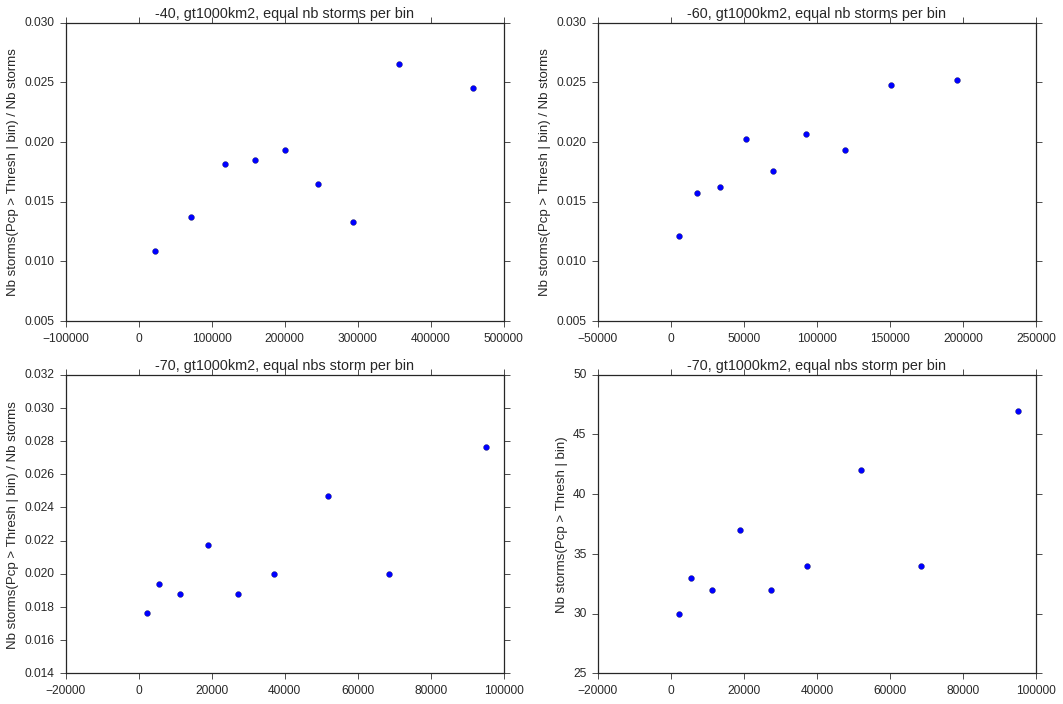

In [7]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,10), dpi=400)

ax = f.add_subplot(221)
plt.scatter(f40[3], f40[0]/np.sum(f40[2]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms" )
plt.title("-40, gt1000km2, equal nb storms per bin")

ax = f.add_subplot(222)
plt.scatter(f60[3], f60[0]/np.sum(f60[2]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms" )
plt.title("-60, gt1000km2, equal nb storms per bin")

ax = f.add_subplot(223)
plt.scatter(f70[3], f70[0]/np.sum(f70[2]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms" )
plt.title("-70, gt1000km2, equal nbs storm per bin")

ax = f.add_subplot(224)
plt.scatter(f70[3], f70[0], s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin)" )
plt.title("-70, gt1000km2, equal nbs storm per bin")


plt.tight_layout()
#plt.savefig(path+'MFG_areabins_new.png')

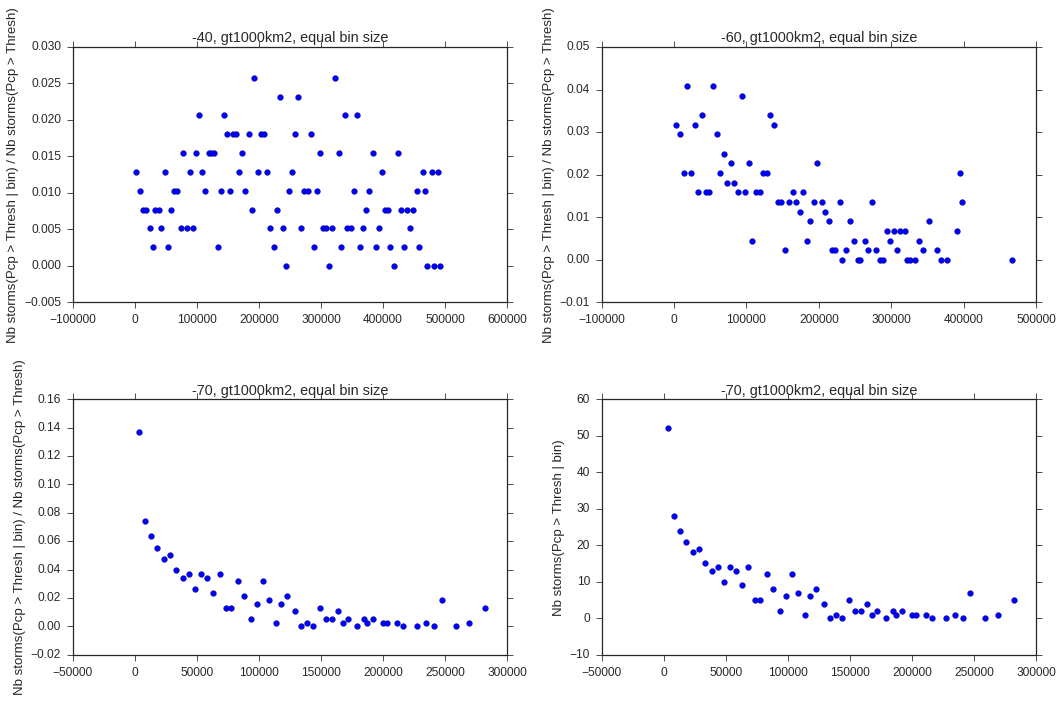

In [8]:
path = '/users/global/cornkle/C_paper/chris2016/figs/'
f = plt.figure(figsize=(15,10), dpi=400)

ax = f.add_subplot(221)
plt.scatter(tf40[3], tf40[0]/np.sum(tf40[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms(Pcp > Thresh)" )
plt.title("-40, gt1000km2, equal bin size")

ax = f.add_subplot(222)
plt.scatter(tf60[3], tf60[0]/np.sum(tf60[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms(Pcp > Thresh)" )
plt.title("-60, gt1000km2, equal bin size")

ax = f.add_subplot(223)
plt.scatter(tf70[3], tf70[0]/np.sum(tf70[0]), s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin) / Nb storms(Pcp > Thresh)" )
plt.title("-70, gt1000km2, equal bin size")

ax = f.add_subplot(224)
plt.scatter(tf70[3], tf70[0], s=35)
plt.ylabel("Nb storms(Pcp > Thresh | bin)" )
plt.title("-70, gt1000km2, equal bin size")


plt.tight_layout()
#plt.savefig(path+'areabins_new.png')

In [27]:
np.sum(tf60[0]/np.sum(tf60[0]))

1.0

In [90]:
f70[3]

array([  4205.9,  12803.1,  27056.2,  54263.9])